<a href="https://colab.research.google.com/github/KenyanGeek/Deep-Learning/blob/master/Cancer_Image_Classifier_Using_Fastai_%26_Google_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Skin Cancer Image Classifier
We will be building an image classifier using **Fastai's v1.0 Library.** The model we will build will be a *pretrained* **resnet34** model. 

We will:

1. Scrape google images for data
2. Preprocess our data
  1. Remove all images that aren't 'jpg' 
  2. Trim our data (images) too 100 for each directory
  3. Rename our images
  4. Create New Directory tree
  5. Create Train, Valid sets
3. Building & Training Our (Pre-trained) Model


In [1]:
# installing fastai version 1.0 library
!pip install fastai

In [0]:
# importing all libraries
import os
import shutil
import pandas as pd
from fastai.vision import *

### 1. Scrape Google Images for Data
We will be using 

```
google_images_download
```
for scraping google images



In [3]:
# Downloading google image scraper & chromedriver (allows us to download more than 100 images)
!pip install google_images_download
!sudo apt-get install chromium-chromedriver

    100% |████████████████████████████████| 911kB 14.4MB/s 
  Running setup.py bdist_wheel for google-images-download ... - \ | done
  Stored in directory: /root/.cache/pip/wheels/d2/23/84/3cec6d566b88bef64ad727a7e805f6544b8af4a8f121f9691c
Successfully built google-images-download
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  chromium-browser chromium-browser-l10n chromium-codecs-ffmpeg-extra
  libauthen-sasl-perl libdata-dump-perl libencode-locale-perl
  libfile-basedir-perl libfile-desktopentry-perl libfile-listing-perl
  libfile-mimeinfo-perl libfont-afm-perl libhtml-form-perl libhtml-format-perl
  libhtml-parser-perl libhtml-tagset-perl libhtml-tree-perl
  libhttp-cookies-perl libhttp-daemon-perl libhttp-date-perl
  libhttp-message-perl libhttp-negotiate-perl libio-html-perl
  libio-socket-ssl-perl libipc-system-simple-perl liblwp-mediatypes-perl
  liblwp-protocol-https-pe

The chromedriver's path is: `/usr/lib/chromium-browser/chromedriver`

In [4]:
# downloading images
!googleimagesdownload --keywords "Skin Cancer,Benign Mole" --limit 120 --format jpg --type photo --size medium --chromedriver /usr/lib/chromium-browser/chromedriver


Item no.: 1 --> Item name = Skin Cancer
Evaluating...
Getting you a lot of images. This may take a few moments...
Reached end of Page.
Starting Download...
Completed Image ====> 1. dermnet_photo_of_squamous_cell_carcinoma_lesion.jpg
Completed Image ====> 2. princ_photo_of_skin_cancer_screening.jpg
Completed Image ====> 3. collage_of_basal_cell_carcinoma.jpg
Completed Image ====> 4. 886140-figure2.jpg
Completed Image ====> 5. 1497971048492.jpg
Completed Image ====> 6. simple-ways-to-spot-skin-cancer-slide-01.jpg
Completed Image ====> 7. c0167371.2e16d0ba.fill-920x613.jpg
Completed Image ====> 8. image.img.full.high.jpg
Completed Image ====> 9. 1497970919728.jpg
Completed Image ====> 10. skin-cancer.jpg
Completed Image ====> 11. g19ioji_psoriasis-_625x300_27_july_18.jpg
Completed Image ====> 12. 185-researchersd.jpg
Completed Image ====> 13. pso.jpg
Completed Image ====> 14. fe7e118e644253563b60ea93086ec51f_xl.jpg
Completed Image ====> 15. hqdefault.jpg
Completed Image ====> 16. skin-ca

### 2. Pre-processing Our Data
Now that we have downloaded 120 images (of each), we must first clean some of the data. 

If you were attempt to train the model based on the raw images we have just downloaded, you will likely run into issues. 

Reasons being, though we have specified 'jpg' images, there are a few images from various formats. 

1. Thus the first thing we will do is remove all images that aren't 'jpg' 
2. Trim our data (images) too 100 for each directory
3. Rename our images
4. Creating Directory tree
5. Create Train, Valid sets

**Removing all image's that aren't jpg & Trimming our data to 100 images per directory** 

In [0]:
# Paths for both benign images, cancer images

# Benign folder
PATH_BENIGN = "./downloads/Benign Mole"

# Cancer folder
PATH_CANCER = "./downloads/Skin Cancer"

In [6]:
# The following line will list the directory
os.listdir(PATH_CANCER)[:5]

['75. 17-researchersl.jpg',
 '18. ak-3.jpg',
 '80. skincancershoulder1_zpstxyyi1ag.jpg',
 '64. 1146-rash_skin_cancer-642x361-slide3.jpg',
 '1. dermnet_photo_of_squamous_cell_carcinoma_lesion.jpg']

In [0]:
# function to remove images that aren't jpgs
def clean_dir(PATH):
    for file in os.listdir(PATH):
        if file.endswith('.jpg'):
            pass
        else:
            os.remove(f'{PATH}/{file}')

# function to trim the folder down to 100 images
def shape_dir(PATH):
    count = 0
    for file in os.listdir(PATH):
        count += 1
        if count > 100:
            os.remove(f'{PATH}/{file}')
    print('finished')

In [8]:
# calling functions
clean_dir(PATH_BENIGN)
clean_dir(PATH_CANCER)

shape_dir(PATH_BENIGN)
shape_dir(PATH_CANCER)

finished
finished


**Now to rename our images**

In [0]:
os.getcwd()

new_name = ['benign', 'cancer']

def parse_images(path, new_name):
    for i, filename in enumerate(os.listdir(path)):
        os.rename(path + "/" + filename, path + "/" + new_name + "." + str(i) + ".jpg")

parse_images(PATH_BENIGN, new_name[0])
parse_images(PATH_CANCER, new_name[1])

In [10]:
# Let's check if the name's have been changed
print(os.listdir(PATH_BENIGN)[:5])
print(os.listdir(PATH_CANCER)[:5])

['benign.15.jpg', 'benign.75.jpg', 'benign.51.jpg', 'benign.79.jpg', 'benign.20.jpg']
['cancer.94.jpg', 'cancer.18.jpg', 'cancer.48.jpg', 'cancer.85.jpg', 'cancer.35.jpg']


In [11]:
series = pd.Series(os.listdir(PATH_CANCER))
series.nunique()

100

**Creating directory tree**

Now that we have renamed all files in both directories, our next task is to create this folder structure:
- train 
    - cancer
    - benign
- valid
    - cancer
    - benign

In [0]:
# run this following script to make the directory structure
%mkdir cancerdata
%mkdir cancerdata/train | mkdir cancerdata/valid
%mkdir cancerdata/train/benign | mkdir cancerdata/train/cancer
%mkdir cancerdata/valid/benign | mkdir cancerdata/valid/cancer

**Creating Train, Valid split**

Now that we have created the directory structure, our next task is to split all of our data into 

* train
* valid 

we will split **80%** of our data into training, while the remaining **20%** into valid (testing)

In [0]:
# Grabbing file paths
source = ['./downloads/Benign Mole', './downloads/Skin Cancer']
train_dest = ['./cancerdata/train/benign', './cancerdata/train/cancer']
valid_dest = ['./cancerdata/valid/benign', './cancerdata/valid/cancer']

In [0]:
# Creating our function to split into Train, Valid sets
def split_images(source, train_dest, valid_dest, f_name):
    files = os.listdir(source)
    iter_t = 80
    iter_v =20
    for i in range(iter_t):
        shutil.move(source + '/' + f_name + '.' + str(i) + '.jpg', train_dest)
    for i in range(iter_v):
        shutil.move(source + '/' + f_name + '.' + str(i + 80) + '.jpg', valid_dest)

In [0]:
# Calling the functions

# Benign Moles
split_images(source[0], train_dest[0], valid_dest[0], f_name='benign')

# Skin Cancer
split_images(source[1], train_dest[1], valid_dest[1], f_name='cancer')

**Before moving forward, let's check our data**

Let's double check the size of each directory, we will be using the **pandas** library, you can do the same with simple numpy arrays 

In [0]:
# Transforming our data in pandas series
series_train_benign = pd.Series(os.listdir(train_dest[0]))
series_train_cancer = pd.Series(os.listdir(train_dest[1]))
series_valid_benign = pd.Series(os.listdir(valid_dest[0]))
series_valid_cancer = pd.Series(os.listdir(valid_dest[1]))

In [17]:
# Checking our data
print(f'train/benign set = {series_train_benign.nunique()}')
print(f'train/cancer set = {series_train_cancer.nunique()}')
print(f'valid/benign set = {series_valid_benign.nunique()}')
print(f'valid/cancer set = {series_valid_cancer.nunique()}')

train/benign set = 80
train/cancer set = 80
valid/benign set = 20
valid/cancer set = 20


### 3. Building The Model

We will be using **fastai v1.0** using a *pre-trained* **resnet34** model 

Since we will be using the fastai library, we will be able to write a state of the art conv_net image classifer with just 4 lines of code. 

Later in the next series I will show you how to build this model from scratch 

The model we will be using is the **resnet34** 

In [18]:
# checking for GPU
torch.cuda.is_available()

True

In [19]:
# Let's see if acceleration is available
torch.backends.cudnn.enabled

True

In [20]:
# Listing path of data
PATH = './cancerdata'

os.listdir(PATH) # checks the path

['train', 'valid']

In [0]:
data = ImageDataBunch.from_folder(PATH, ds_tfms=get_transforms(),
                                   size=224).normalize(imagenet_stats)
learn = create_cnn(data, models.resnet34, metrics=accuracy)

In [22]:
learn.fit_one_cycle(10)

epoch,train_loss,valid_loss,accuracy
1,0.939359,1.015122,0.475000
2,0.893548,0.655880,0.600000
3,0.816235,0.548318,0.775000
4,0.750777,0.477799,0.800000
5,0.674616,0.500409,0.775000
6,0.614022,0.495010,0.800000
7,0.577624,0.490238,0.800000
8,0.558757,0.490794,0.800000
9,0.528523,0.498414,0.775000
10,0.495531,0.505012,0.775000


**Let's look at our data - top losses**

In [0]:
 interp = ClassificationInterpretation.from_learner(learn)

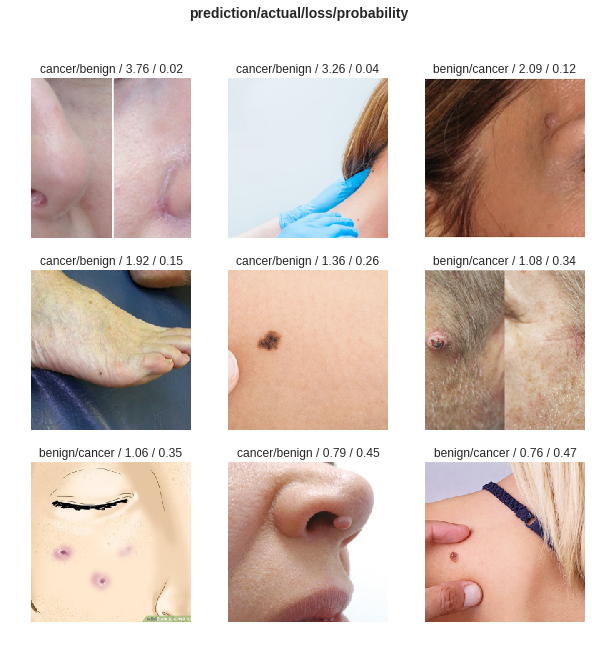

In [24]:
# Showing top losses
interp.plot_top_losses(9, figsize=(10,10))

### Conclusion
So from looking at our top losses, it's safe to assume our model couldn't reach high generalization due to images we fed the model.

If you take a look, some of these images don't best represent the data we are trying to model for. 

Thus, a solution to this would be to get better data. 